[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/master/Linear-Regression/LinearRegressionGradDescent.ipynb)

## Linear Regression using Gradient Descent calculated 'by hand'
#### By Gregory Glickert

### The first thing we need to do is get some data generated

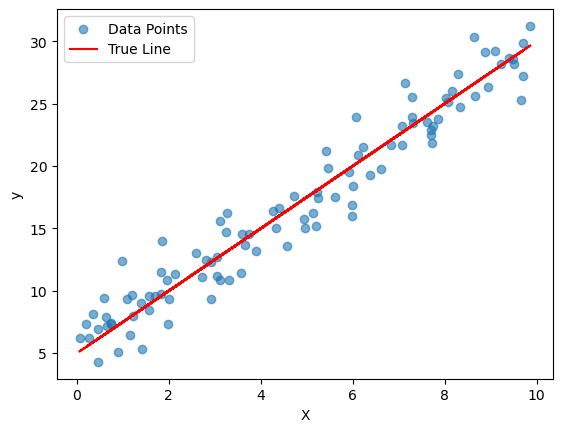

Data was generated using slope 2.5 and intercept 5 with a bit of noise


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set a random seed for reproducibility
np.random.seed(42)

# Generate some example data
n_samples = 100
X = np.random.uniform(0, 10, n_samples)  # Independent variable
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, n_samples)  # Random noise

# Dependent variable (y)
y = true_slope * X + true_intercept + noise

# Plot our data
plt.scatter(X, y, alpha=0.6, label='Data Points')
plt.plot(X, true_slope * X + true_intercept, color='red', label="True Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
print(f"Data was generated using slope {true_slope} and intercept {true_intercept} with a bit of noise")



## Explanation of the `predict` Function

The `predict` function computes the predicted value $\hat{y}$ for a given input $x$ and model parameters $m$ (slope) and $b$ (intercept):

$$
\hat{y} = m \cdot x + b
$$



In [2]:
# Predict function 
def predict(x, m, b):
    return m * x + b




### Mean Squared Error (MSE)

The **Mean Squared Error (MSE)** is calculated using the following equation:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

Where:
- $n$ is the number of data points,
- $\hat{y}_i$ is the predicted value for the \(i\)-th data point,
- $y_i$ is the actual value for the \(i\)-th data point.


In [3]:
# Compute cost function (MSE)
def compute_cost(X, y, m, b):
    n = len(y)
    total_error = 0
    for i in range(n):
        y_pred = predict(X[i], m, b)
        total_error += (y_pred - y[i])**2
    return total_error / (2 * n)


### Gradient Descent

**Gradient Descent** is an iterative optimization algorithm used to minimize a cost function, typically the **Mean Squared Error (MSE)** in linear regression. The goal is to find the optimal model parameters $m$ (slope) and $b$ (intercept) that minimize the cost function.

The update rules for the parameters during each iteration are:

$$
m := m - \alpha \cdot \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \cdot x_i
$$

$$
b := b - \alpha \cdot \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
$$

Where:
- $\alpha$ is the learning rate,
- $n$ is the number of data points,
- $x_i$ and $y_i$ are the individual data points.


In [4]:

# Gradient Descent function
def gradient_descent(X, y, m_init, b_init, learning_rate, n_iterations, show_progress=True):
    m = m_init
    b = b_init
    n = len(y)
    cost_history = []

    for iteration in range(n_iterations):
        m_gradient = 0
        b_gradient = 0

        # Calculate gradients
        for i in range(n):
            y_pred = predict(X[i], m, b)
            m_gradient += (y_pred - y[i]) * X[i]
            b_gradient += (y_pred - y[i])

        m_gradient /= n
        b_gradient /= n

        # Update parameters
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient

        # Save cost for history
        cost_history.append(compute_cost(X, y, m, b))

        if show_progress and iteration % 50 == 0:
            plt.scatter(X, y, color='blue', label='Data')

            # Plot fitted line
            X_line = np.linspace(min(X), max(X), 100)
            y_line = predict(X_line, m, b)
            plt.plot(X_line, y_line, color='red', label='Fitted line')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.title(f'Regression at iteration {iteration}')
            plt.legend()
            plt.show()
            print(f"Iteration {iteration}: Intercept = {b}, Slope = {m}")
    
    return m, b, cost_history



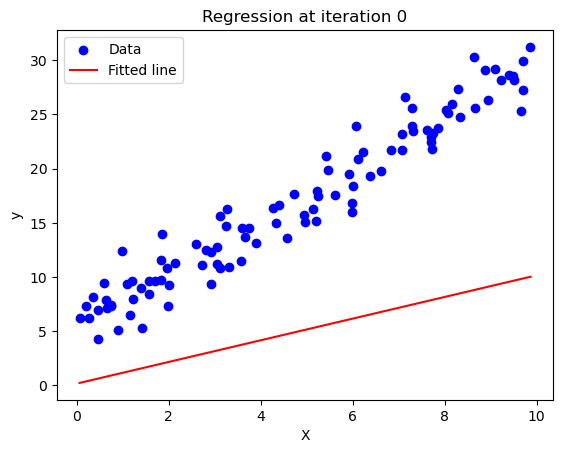

Iteration 0: Intercept = 0.1675235786412052, Slope = 0.9986443811362076


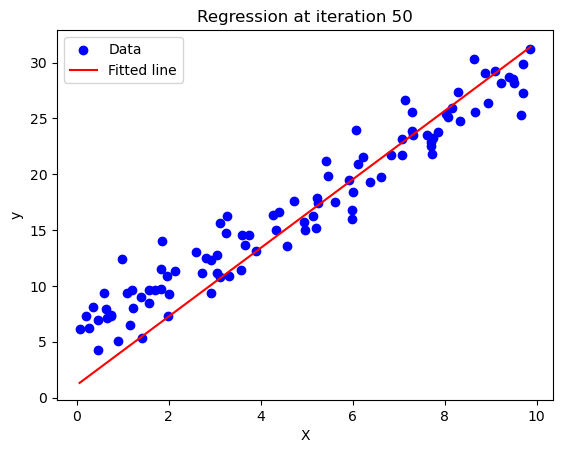

Iteration 50: Intercept = 1.1397329604290722, Slope = 3.067481650369421


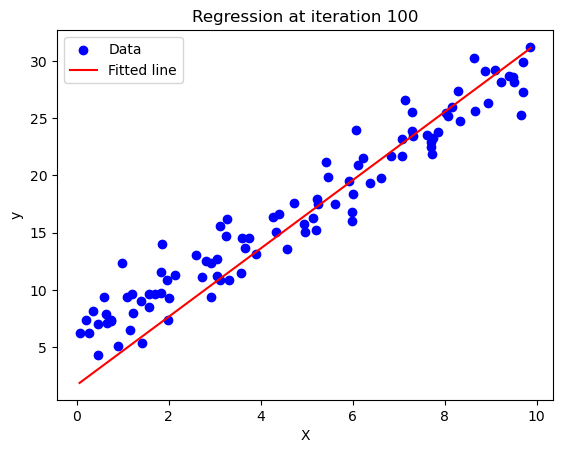

Iteration 100: Intercept = 1.6960018332495717, Slope = 2.9819840829883897


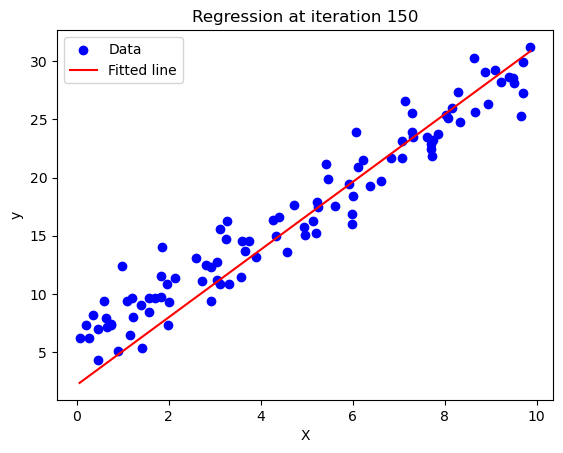

Iteration 150: Intercept = 2.180149042756982, Slope = 2.907571480005113


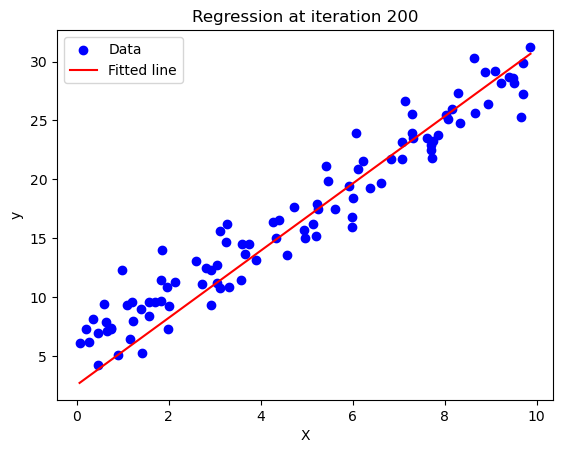

Iteration 200: Intercept = 2.6015253460630383, Slope = 2.842806658585659


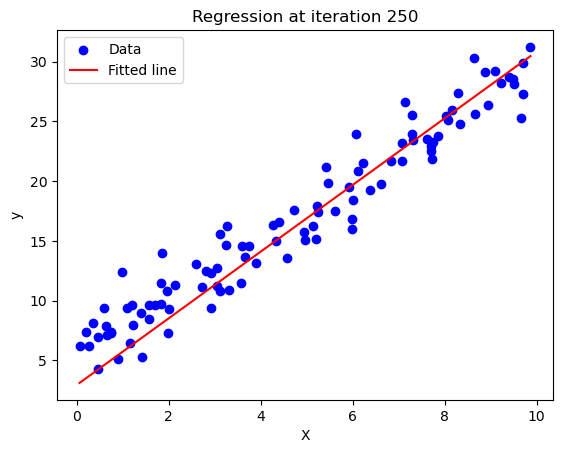

Iteration 250: Intercept = 2.968269149396185, Slope = 2.7864387595291453


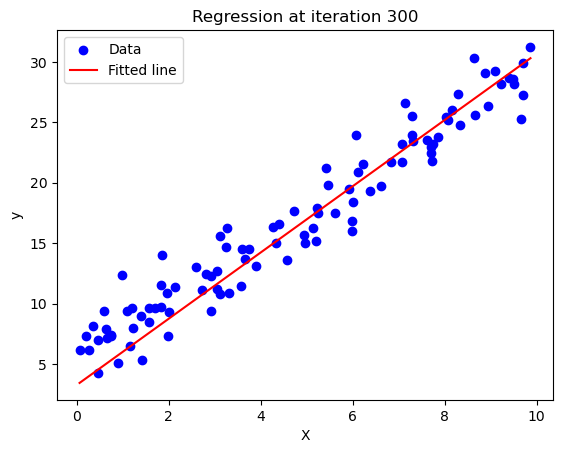

Iteration 300: Intercept = 3.287463694101207, Slope = 2.73737910068338


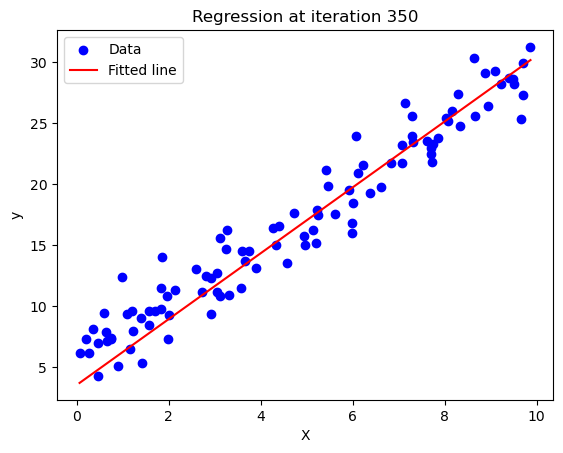

Iteration 350: Intercept = 3.5652738614263657, Slope = 2.694680150281667


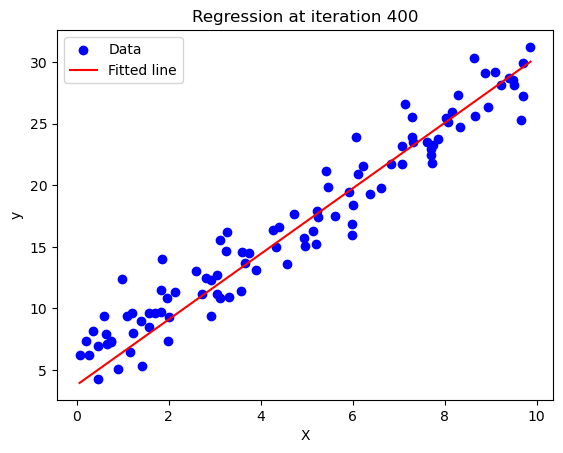

Iteration 400: Intercept = 3.8070652402250094, Slope = 2.6575172264394977


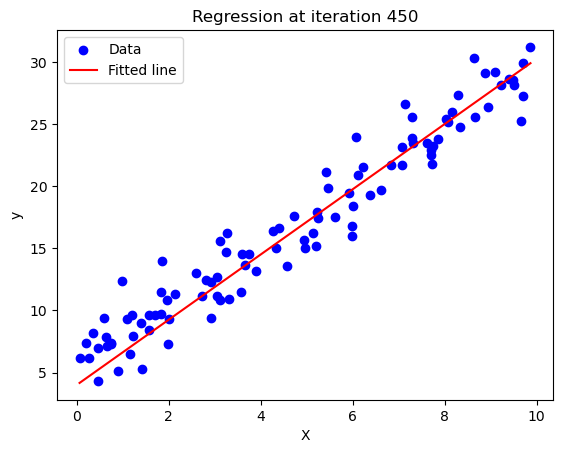

Iteration 450: Intercept = 4.017507757229516, Slope = 2.6251725693576353


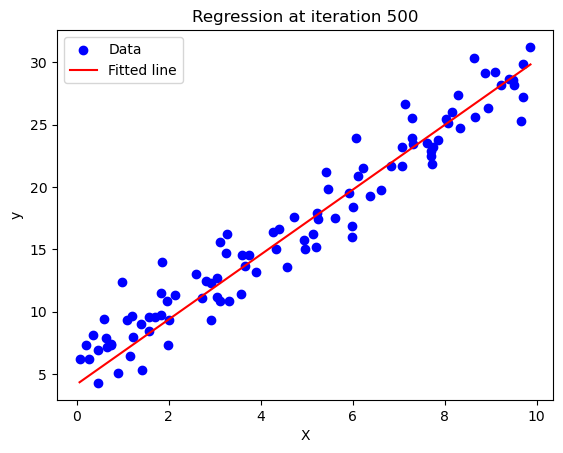

Iteration 500: Intercept = 4.200665871398971, Slope = 2.597021478604217


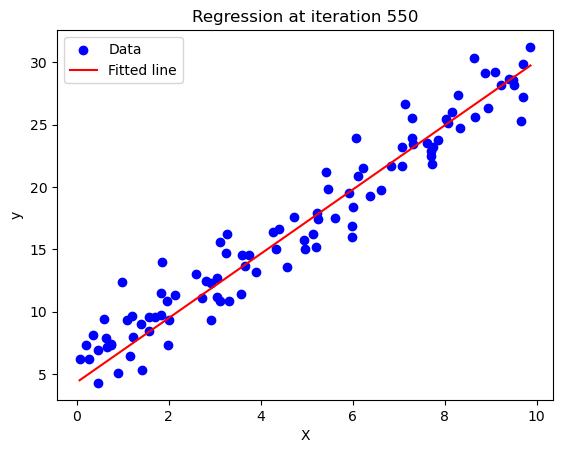

Iteration 550: Intercept = 4.3600770743423025, Slope = 2.572520247733181


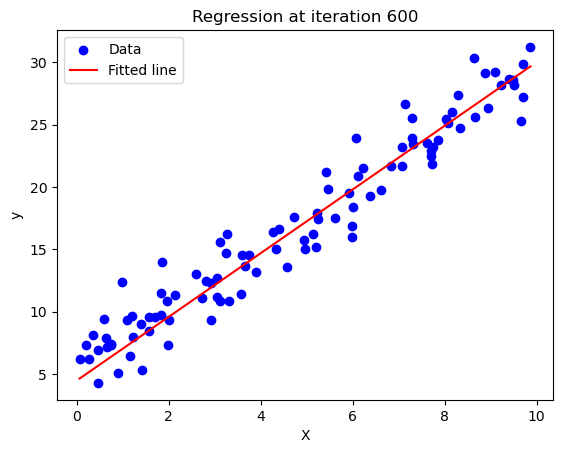

Iteration 600: Intercept = 4.4988202129636665, Slope = 2.5511956632098305


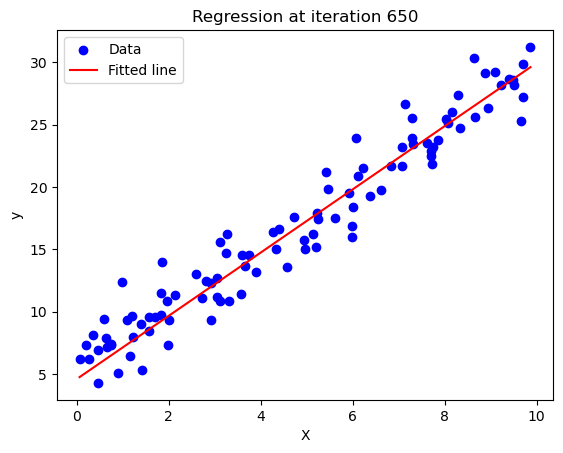

Iteration 650: Intercept = 4.619574953904609, Slope = 2.5326358648271663


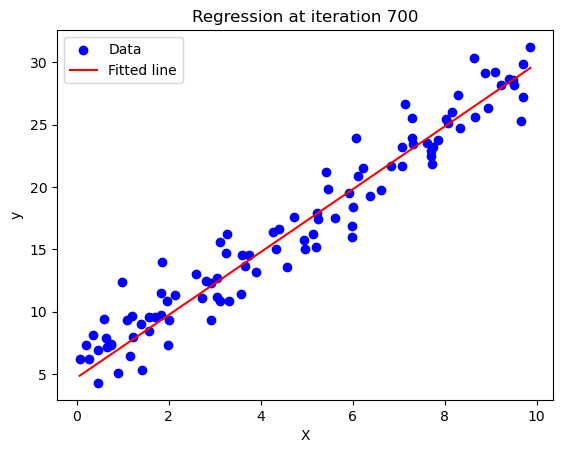

Iteration 700: Intercept = 4.724673538271431, Slope = 2.5164823910922878


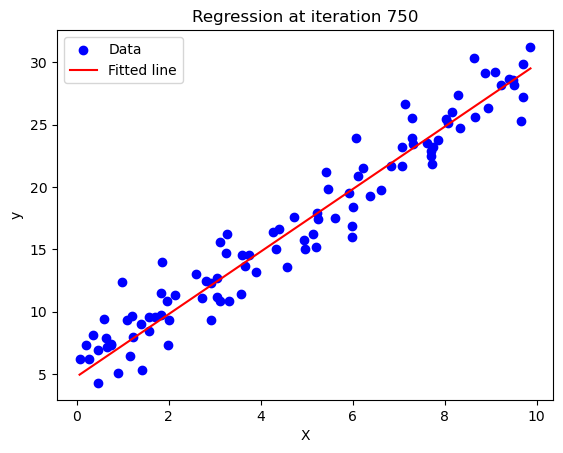

Iteration 750: Intercept = 4.816145826231638, Slope = 2.5024232559484947


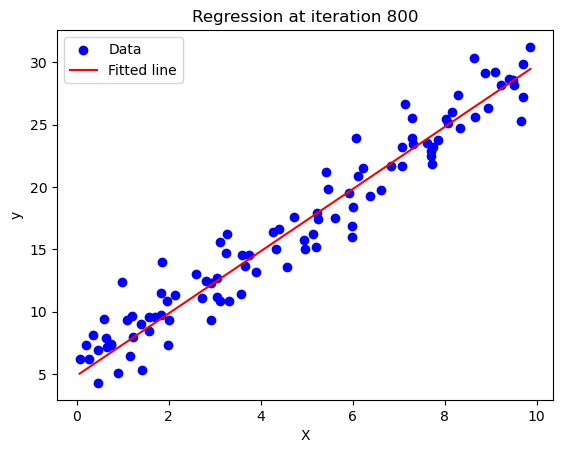

Iteration 800: Intercept = 4.89575850146493, Slope = 2.4901869231178275


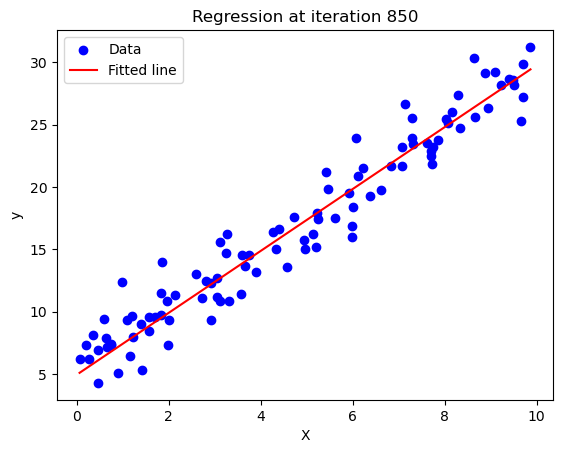

Iteration 850: Intercept = 4.9650491926583005, Slope = 2.4795370616852788


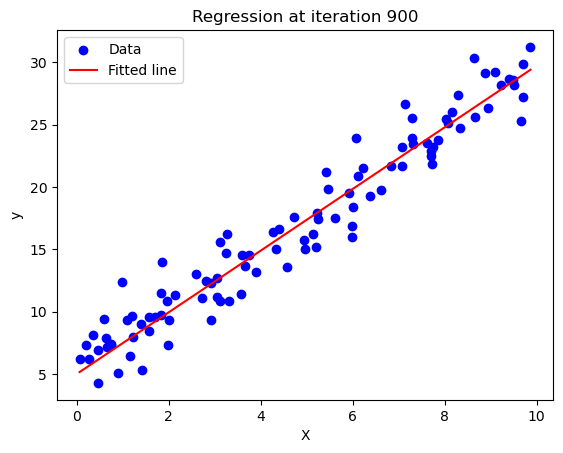

Iteration 900: Intercept = 5.025356171063259, Slope = 2.47026798163474


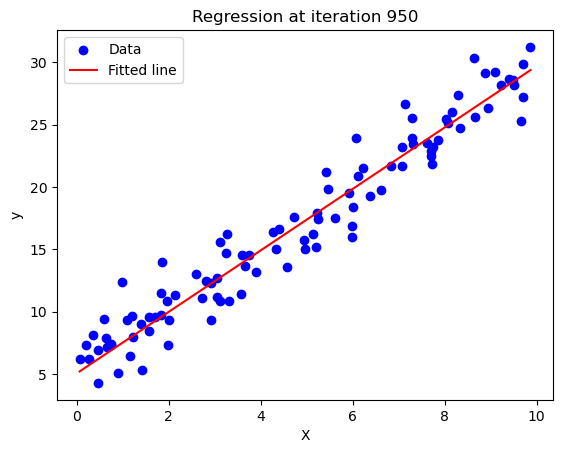

Iteration 950: Intercept = 5.077844197689902, Slope = 2.462200661179216


In [5]:
# Run gradient descent

# Initialize parameters
m_init = 0  # Initial guess of slope
b_init = 0  # Initial guess of intercept
learning_rate = 0.01
n_iterations = 1000
show_progess = True # show progess of desecent every 50 iter

# Perform gradient descent
optimal_m, optimal_b, cost_history = gradient_descent(X, y, m_init, b_init, learning_rate, n_iterations,show_progress=show_progess)


Estimated intercept: 5.122674147874304
Estimated slope: 2.455310374053062


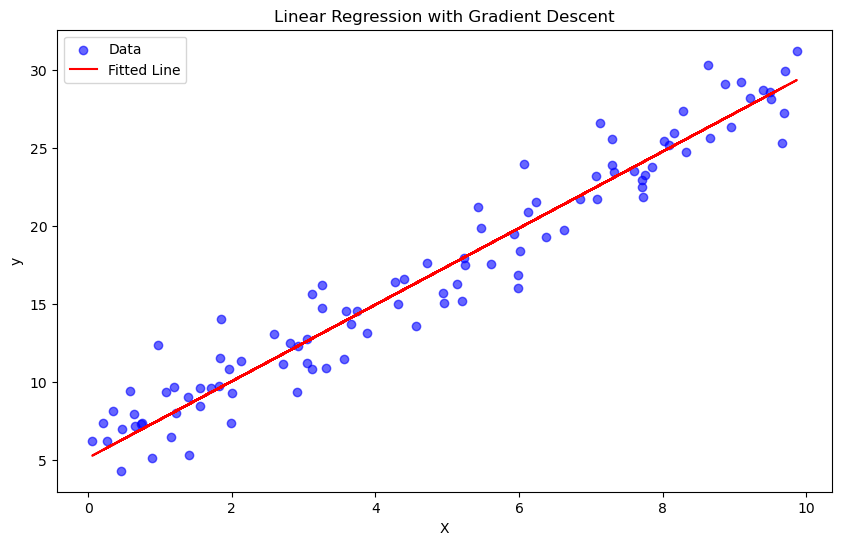

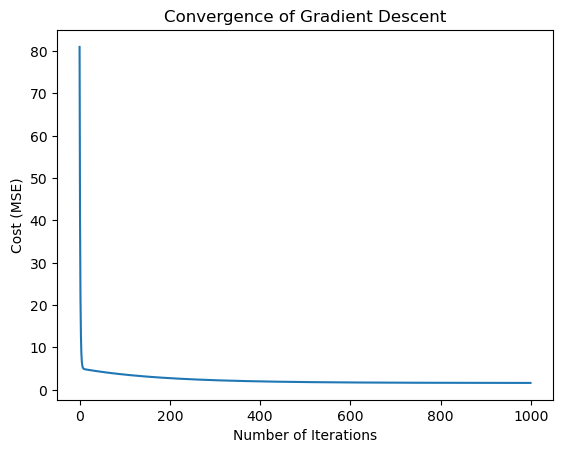

In [6]:
# Extract the slope and intercept
print(f"Estimated intercept: {optimal_b}")
print(f"Estimated slope: {optimal_m}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.plot(X, predict(X, optimal_m, optimal_b), color="red", label="Fitted Line")
plt.title("Linear Regression with Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


# Plot the cost function's history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Convergence of Gradient Descent')
plt.show()
